## 1.Import libraries
The required libraries for this notebook are pandas, sklearn, numpy and matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
# from skimage.color import rgb2gray
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics

## 2.1 Edit label.csv data
Add column for binary label: 0 for no tumor, 1 for tumor

In [2]:
df = pd.read_csv('./dataset/label.csv')
df.head()

,file_name,label
0,IMAGE_0000.jpg,meningioma_tumor
1,IMAGE_0001.jpg,no_tumor
2,IMAGE_0002.jpg,meningioma_tumor
3,IMAGE_0003.jpg,glioma_tumor
4,IMAGE_0004.jpg,meningioma_tumor


## 2.2 Add image data
Add image data in the form of an array to the label data and save it in a new pickle file so it does not need to run everytime

In [3]:
def create_binary(df):
    '''
    Inputs
        df: Label data.
        
    Return
        binary: List of binary labels - 0 if no tumor, 1 if tumor.
    '''
    
    binary = []
    for label in df['label']:
        if 'no_tumor' in label:
            binary.append(0)
        else:
            binary.append(1)
    return binary

In [4]:
def extract_hog(data_path, df):
    '''
    Inputs
        data_path: Directory path to images in dataset;
        df: Label data.
        
    Return
       hog_features: A list of HOG features for each image
    '''
    hog_features = []
    for filename in df['file_name']:
        # use imread to load image from specified file name in grayscale
        im = imread(os.path.join(data_path, filename), as_gray = True)
        # use resize the image to a 128 by 64 pixel image
        resized_im = resize(im, (128, 64))
        # Extract Histogram of Oriented Gradients (HOG) for the image
        fd = hog(resized_im, orientations = 9, pixels_per_cell = (8, 8),
                            cells_per_block = (2, 2), visualize = False, block_norm='L2-Hys')
        hog_features.append(fd)
    return hog_features

In [5]:
def PCAPredict(X_train, X_test, k):
    '''
    Inputs
        X_train: Training dataset;
        X_test: Testing dataset;
        k: Number of components to use.
        
    Return
        X_train_PCA: Training dataset after applying PCA to reduce its dimensions;
        X_test_PCA: Test dataset after applying PCA to reduce its dimensions.
    '''

    # the built-in function for PCA
    pca = PCA(k)
    
    # # the built-in function to standardize features by removing the mean and scaling to unit variance
    # scaler = StandardScaler()
    
    # fit the algorithm with dataset
    
#     scaler.fit(X_train)
#     X_train_scaled = scaler.transform(X_train)
#     X_test_scaled = scaler.transform(X_test)
    
#     pca.fit(X_train_scaled)
#     X_train_PCA = pca.transform(X_train_scaled)
#     X_test_PCA = pca.transform(X_test_scaled)
    
    pca.fit(X_train)
    X_train_PCA = pca.transform(X_train)
    X_test_PCA = pca.transform(X_test)
    
    return X_train_PCA, X_test_PCA

In [6]:
def flatten_image(data_path, df):
    '''
    Inputs
        data_path: Directory path to images in dataset;
        df: Label data.
        
    Return
       image_data: A list of image data (pixels) vector for each image
    '''
    image_data = []
    for filename in df['file_name']:
        # use imread to load image from specified file name in grayscale
        im = imread(os.path.join(data_path, filename), as_gray = True)
        # use resize the image to a 28 by 28 pixel image
        resized_im = resize(im, (28, 28))
        # Flatten the matrix to a vector
        flattened_image = resized_im.flatten()
        image_data.append(flattened_image)
    return image_data

In [7]:
if os.path.exists('./dataset/label_taskA_hog.pkl'):
    print('The pickle file for Task A with hog features data already exists')
else:
    data_path = './dataset/image'
    binary = create_binary(df)
    hog_features = extract_hog(data_path, df)
    
    label_taskA = pd.DataFrame(data = hog_features)
    label_taskA['binary_label'] = binary
    label_taskA.to_pickle("./dataset/label_taskA_hog.pkl")

The pickle file for Task A with hog features data already exists


In [8]:
if os.path.exists('./dataset/label_taskA_flatten.pkl'):
    print('The pickle file for Task A with flattened image data already exists')
else:
    data_path = './dataset/image'
    binary = create_binary(df)
    image_data = flatten_image(data_path, df)

    label_taskA = pd.DataFrame(data = image_data)
    label_taskA['binary_label'] = binary
    label_taskA.to_pickle("./dataset/label_taskA_flatten.pkl")

The pickle file for Task A with flattened image data already exists


In [9]:
# if os.path.exists('./dataset/label_taskA.pkl'):
#     print('The pickle file with image data already exists')
# else:
#     data_path = './dataset/image'
#     # create an empty column to store image data
#     # df['data'] = df['data'].astype(object)
#     hog_features = []
#     for filename in df['file_name']:
#         # use imread to load image from specified file name
#         im = imread(os.path.join(data_path, filename))
#         # use resize the image to a 128 by 64 pixel image
#         resized_im = resize(im, (128, 64))
#         # Extract Histogram of Oriented Gradients (HOG) for the image
#         fd = hog(resized_im, orientations = 9, pixels_per_cell = (8, 8),
#                             cells_per_block = (2, 2), visualize = False, block_norm='L2-Hys')
#         # find index/row number of image file name
#         # idx = df.loc[df['file_name'] == filename].index[0]
#         # save HOG information in 'data' column
#         # df.loc[idx, 'data'] = [fd] 
#         # this resulted in an error: Must have equal len keys and value when setting with an ndarray
#         hog_features.append(fd)
        
#     hog_features
#     df.to_pickle("./dataset/label_taskA.pkl")

In [10]:
# # use np.unique to get all unique values in the list of labels
# labels = np.unique(df_edited['label'])

# # set up the matplotlib figure and axes, based on the number of labels
# fig, axes = plt.subplots(1, len(labels))
# fig.set_size_inches(15,4)
# fig.tight_layout()
 
# # make a plot for every label (equipment) type. The index method returns the 
# # index of the first item corresponding to its search string, label in this case
# for ax, label in zip(axes, labels):
#     idx = df_edited.loc[df_edited['label'] == label].index[0]
#     ax.imshow(df_edited.loc[idx, 'data'])
#     ax.axis('off')
#     ax.set_title(label)

In [20]:
feature = 'hog'
usingPCA = False

if feature == 'hog':
    # Doing classification with image HOG features
    label_taskA = pd.read_pickle("./dataset/label_taskA_hog.pkl")
elif feature == 'flatten':
    # Doing classification with flattened image data with PCA
    label_taskA = pd.read_pickle("./dataset/label_taskA_flatten.pkl")
    usingPCA = True
    
X = label_taskA.drop('binary_label',axis=1) # All other features
Y = label_taskA['binary_label'] # binary label

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 3) 
#test_size= should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
#everytime you run it without specifying random_state, you will get a different result, this is expected behavior
#print (len(X_test), len(y_test))

print('train set: {}  | test set: {}'.format(round(((len(y_train)*1.0)/len(X)),3),
                                                       round((len(y_test)*1.0)/len(X),3)))
# Doing image pre-processing with PCA
if usingPCA == True:
    k = 2
    X_train, X_test = PCAPredict(X_train, X_test, k)

train set: 0.7  | test set: 0.3


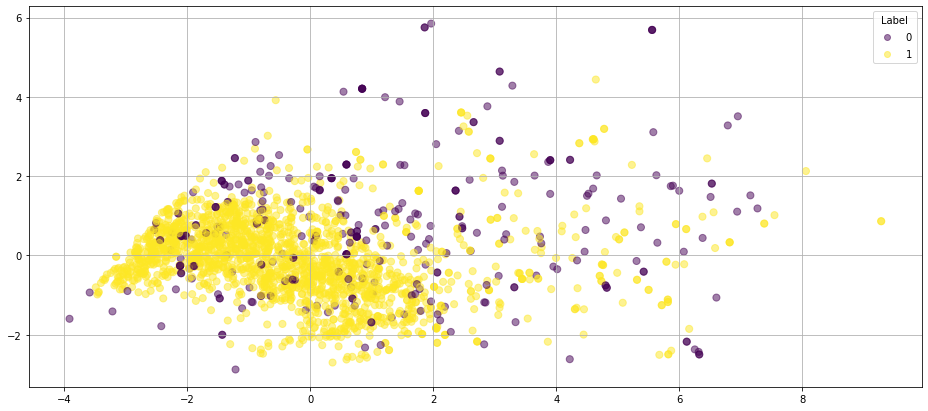

In [12]:
fig = plt.figure(figsize=(16, 7))

scatter = plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=50, alpha=0.5, cmap='viridis' )
plt.legend(*scatter.legend_elements(), title="Label")

plt.grid()
plt.show()

In [13]:
def KNNClassifier(X_train, y_train, X_test, k):
    '''
    Inputs
        X_train: Training dataset;
        y_train: Training labels;
        X_test: Testing dataset;
        k: Number of nearest neighbours to use.
        
    Return
        Y_pred: Predicted labels from X_test using K-Nearest Neighbour.
    '''

    #Create KNN object with a K coefficient
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) # Fit KNN model

    Y_pred = neigh.predict(X_test)
    
    return Y_pred

# clf = svm.SVC()
# clf.fit(X_train, y_train)
# Y_pred = clf.predict(X_test)
# throws error: setting an array element with a sequence
# when getting X from dataframe, the resulting array is dtype object,
# but when getting X directly from hog_features, resulting array is dtype float??

In [14]:
def TreeClassifier(X_train, y_train, X_test):
    '''
    Inputs
        X_train: Training dataset;
        y_train: Training labels;
        X_test: Testing dataset.
        
    Return
        Y_pred: Predicted labels from X_test using Decision Trees.
    '''
    
    #Importing the Decision tree classifier from the sklearn library.
    tree_params={
        'criterion':'entropy'
    }
    clf = tree.DecisionTreeClassifier( **tree_params )
    
    #Training the decision tree classifier on training set. 
    clf.fit(X_train, y_train)

    #Predicting labels on the test set.
    Y_pred =  clf.predict(X_test)
    
    return Y_pred

In [18]:
def RFClassifier(X_train, y_train, X_test, k):
    '''
    Inputs
        X_train: Training dataset;
        y_train: Training labels;
        X_test: Testing dataset;
        k: Number of trees in the forest.
        
    Return
        Y_pred: Predicted labels from X_test using Random Forests.
    '''
    
    clf=RandomForestClassifier(n_estimators=k)

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    # prediction on test set
    Y_pred=clf.predict(X_test)
    
    return Y_pred

In [16]:
def SVMClassifier(X_train, y_train, X_test):
    '''
    Inputs
        X_train: Training dataset;
        y_train: Training labels;
        X_test: Testing dataset.
        
    Return
        Y_pred: Predicted labels from X_test using SVM.
    '''

    #Create SCV object with a K coefficient
    clf = svm.SVC()
    clf.fit(X_train, y_train) # Fit KNN model
    Y_pred = clf.predict(X_test)

    return Y_pred

In [21]:
Y_pred_KNN = KNNClassifier(X_train, y_train, X_test, 4)
score_KNN = metrics.accuracy_score(y_test, Y_pred_KNN)

Y_pred_SVM = SVMClassifier(X_train, y_train, X_test)
score_SVM = metrics.accuracy_score(y_test, Y_pred_SVM)

Y_pred_Tree = TreeClassifier(X_train, y_train, X_test)
score_Tree = metrics.accuracy_score(y_test, Y_pred_Tree)

Y_pred_RandomForest = RFClassifier(X_train, y_train, X_test, 100)
score_RandomForest = metrics.accuracy_score(y_test, Y_pred_RandomForest)

print('KNN classifier score:', score_KNN)
print('SVM classifier score:', score_SVM)
print('Decision Tree classifier score:', score_Tree)
print('Random Forest classifier score:', score_RandomForest)

KNN classifier score: 0.9333333333333333
SVM classifier score: 0.9388888888888889
Decision Tree classifier score: 0.9311111111111111
Random Forest classifier score: 0.9411111111111111
